In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
!pip install wordcloud

In [3]:
!pip install textblob

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob

In [5]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\One_Direction_Proper_Dataset.csv')
df

,S.No.,Song,Artist(s),Writer(s),Album(s),Year,Lyrics
0,1,"""18""",One Direction,"Ed Sheeran, Oliver Frank",Four,2014,[Verse 1: Harry]\nI got a heart and I got a so...
1,2,"""A.M.""",One Direction,"Niall Horan, Liam Payne, Harry Styles, Louis T...",Made in the A.M.,2015,[Intro: Harry]\nWon't you stay till the A.M.?\...
2,3,"""Act My Age""",One Direction,"John Ryan, Julian Bunetta, Ed Drewett",Four,2014,"[Intro]\nOne, two, three, four\n\n[Verse 1: Ni..."
3,4,"""Alive""",One Direction,"Julian Bunetta, John Ryan, Jamie Scott, Louis ...",Midnight Memories,2013,[Verse 1: Liam]\nMy mother told me I should go...
4,5,"""Another World""",One Direction,"Achraf Jannusi, Bilal Hajji, Eric Sanicola, Ge...",Up All Night,2011,"[Verse 1: Liam]\nIt's not me, it's not you, th..."
...,...,...,...,...,...,...,...
90,91,"""Where Do Broken Hearts Go""",One Direction,"Harry Styles, Julian Bunetta, Ruth-Anne Cunnin...",Four,2014,"[Verse 1: Niall, All]\nCounted all my mistakes..."
91,92,"""Why Don't We Go There""",One Direction,"Steve Robson, Claude Kelly, Wayne Hector, Loui...",Midnight Memories,2013,"[Verse 1: Harry Styles]\nI know you want, know..."
92,93,"""Wishing on a Star""",The X Factor Finalists 2011 featuring JLSand O...,Billie Rae Calvin,__,2011,[Chorus: Misha B]\nI'm wishin' on a star\nTo f...
93,94,"""Wolves""",One Direction,"Niall Horan, Liam Payne, Will Champlin, Andrew...",Made in the A.M.,2015,"[Intro: Harry, All]\nI hear them calling for y..."


In [6]:
df.shape

(95, 7)

In [7]:
df.columns

Index(['S.No.', 'Song', 'Artist(s)', 'Writer(s)', 'Album(s)', 'Year',
       'Lyrics'],
      dtype='object')

In [8]:
df.head(10)

,S.No.,Song,Artist(s),Writer(s),Album(s),Year,Lyrics
0,1,"""18""",One Direction,"Ed Sheeran, Oliver Frank",Four,2014,[Verse 1: Harry]\nI got a heart and I got a so...
1,2,"""A.M.""",One Direction,"Niall Horan, Liam Payne, Harry Styles, Louis T...",Made in the A.M.,2015,[Intro: Harry]\nWon't you stay till the A.M.?\...
2,3,"""Act My Age""",One Direction,"John Ryan, Julian Bunetta, Ed Drewett",Four,2014,"[Intro]\nOne, two, three, four\n\n[Verse 1: Ni..."
3,4,"""Alive""",One Direction,"Julian Bunetta, John Ryan, Jamie Scott, Louis ...",Midnight Memories,2013,[Verse 1: Liam]\nMy mother told me I should go...
4,5,"""Another World""",One Direction,"Achraf Jannusi, Bilal Hajji, Eric Sanicola, Ge...",Up All Night,2011,"[Verse 1: Liam]\nIt's not me, it's not you, th..."
5,6,"""Back For You""",One Direction,"Kristoffer Fogelmark, Savan Kotecha, Albin Ned...",Take Me Home,2012,"[Verse 1: Liam, Harry]\nWhenever I close my ey..."
6,7,"""Best Song Ever""",One Direction,"Wayne Hector, John Ryan, Ed Drewett, Julian Bu...",Midnight Memories,2013,[Verse 1: Harry]\nMaybe it's the way she walke...
7,8,"""Better Than Words""",One Direction,"Jamie Scott, Julian Bunetta, John Ryan, Liam P...",Midnight Memories,2013,"[Intro: Liam]\nOoh\n\n[Verse 1: Harry, Liam]\n..."
8,9,"""C'mon, C'mon""",One Direction,"Jamie Scott, John Ryan, Julian Bunetta",Take Me Home,2012,"[Intro: Harry, Liam]\nC'mon, c'mon (Ooh)\n\n[V..."
9,10,"""Change My Mind""",One Direction,"Rami Yacoub, Carl Falk, Savan Kotecha",Take Me Home,2012,"[Verse 1: Louis]\nThe end of the night, we sho..."


In [9]:
df.describe()

,S.No.,Year
count,95.000000,95.000000
mean,48.000000,2012.884211
std,27.568098,1.464932
min,1.000000,2010.000000
25%,24.500000,2012.000000
50%,48.000000,2013.000000
75%,71.500000,2014.000000
max,95.000000,2015.000000


In [10]:
df.tail()

,S.No.,Song,Artist(s),Writer(s),Album(s),Year,Lyrics
90,91,"""Where Do Broken Hearts Go""",One Direction,"Harry Styles, Julian Bunetta, Ruth-Anne Cunnin...",Four,2014,"[Verse 1: Niall, All]\nCounted all my mistakes..."
91,92,"""Why Don't We Go There""",One Direction,"Steve Robson, Claude Kelly, Wayne Hector, Loui...",Midnight Memories,2013,"[Verse 1: Harry Styles]\nI know you want, know..."
92,93,"""Wishing on a Star""",The X Factor Finalists 2011 featuring JLSand O...,Billie Rae Calvin,__,2011,[Chorus: Misha B]\nI'm wishin' on a star\nTo f...
93,94,"""Wolves""",One Direction,"Niall Horan, Liam Payne, Will Champlin, Andrew...",Made in the A.M.,2015,"[Intro: Harry, All]\nI hear them calling for y..."
94,95,"""You & I""",One Direction,"Jamie Scott, Julian Bunetta, Niall Horan, John...",Midnight Memories,2013,"[Verse 1: Niall, Liam]\nI figured it out\nI fi..."


In [11]:
df.describe(include='all')

,S.No.,Song,Artist(s),Writer(s),Album(s),Year,Lyrics
count,95.000000,95,95,95,95,95.000000,95
unique,NaN,95,4,85,7,NaN,95
top,NaN,"""18""",One Direction,"Rami Yacoub, Carl Falk, Savan Kotecha",Take Me Home,NaN,[Verse 1: Harry]\nI got a heart and I got a so...
freq,NaN,1,92,6,20,NaN,1
mean,48.000000,NaN,NaN,NaN,NaN,2012.884211,NaN
std,27.568098,NaN,NaN,NaN,NaN,1.464932,NaN
min,1.000000,NaN,NaN,NaN,NaN,2010.000000,NaN
25%,24.500000,NaN,NaN,NaN,NaN,2012.000000,NaN
50%,48.000000,NaN,NaN,NaN,NaN,2013.000000,NaN
75%,71.500000,NaN,NaN,NaN,NaN,2014.000000,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S.No.      95 non-null     int64 
 1   Song       95 non-null     object
 2   Artist(s)  95 non-null     object
 3   Writer(s)  95 non-null     object
 4   Album(s)   95 non-null     object
 5   Year       95 non-null     int64 
 6   Lyrics     95 non-null     object
dtypes: int64(2), object(5)
memory usage: 5.3+ KB


In [13]:
df.isna().sum()

S.No.        0
Song         0
Artist(s)    0
Writer(s)    0
Album(s)     0
Year         0
Lyrics       0
dtype: int64

In [14]:
df.isnull().sum()

S.No.        0
Song         0
Artist(s)    0
Writer(s)    0
Album(s)     0
Year         0
Lyrics       0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.nunique()

S.No.        95
Song         95
Artist(s)     4
Writer(s)    85
Album(s)      7
Year          6
Lyrics       95
dtype: int64

In [17]:
!pip install summarytools

In [18]:
!python --version

Python 3.12.7


In [19]:
!pip install summarytools==0.3.0

from summarytools import dfSummary

In [20]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,S.No.[int64],Mean (sd) : 48.0 (27.6)min < med < max:1.0 < 48.0 < 95.0IQR (CV) : 47.0 (1.7),95 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACQUlEQVR4nO3Yu47aUBRG4X24yVxkC6FARzNlpBQueYg8bB4hBU9AkSYVHRJCRnjGwhinSOrBPpZjfrG+ms0+WIuLcWVZGvDsel0fAKhi8OgBzrmxmY08n/9aluWH52ynu5t41WvW5u5PQ3XOjReLxfcwDOc+m8/n88k598PnxXe5u4lXvWZt7370iToKw3C+2Ww+oijK6ixOkiTYbrfz4/E4MjOfWLrc3cSrXrNWdz/86jczi6IoWy6X73WW/zP2mHma3U286jVrazc3U5BAqJBAqJBQ6Teqr6IohmYWOud8xsP7/T7saLfZ3zfx3WOuy3PL7n6ktVDTNB3mef5tvV73+/1+rbtAM7M8z4OiKL5mWfbTzGr9OG+6uyiKYZqmb7PZ7Hev18vrzHZ5btXdVbQW6vV6HQRBMInjOFutVqe68/v9fr7b7Sa3263f0e4vcRz/qjv/BOeW211Fq1/9ZmbT6dTr74rT6dT4r5Kmu33mn+Hcqrs/w80UJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJAyqPChJkqDuE18ul8DMLE3T4HA4TP7nvOpu1XM3na/S1x/4YKmyZfnTeAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Song[object],"1. ""18""2. ""One Thing""3. ""She's Not Afraid""4. ""Save You Tonight""5. ""Same Mistakes""6. ""Rock Me""7. ""Right Now""8. ""Ready to Run""9. ""Perfect""10. ""Over Again""11. other",1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)1 (1.1%)85 (89.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADpElEQVR4nO3cQWobWRhG0V/CpFuTEsLgZXgBXkQvNovQArwPY1yDVjoT9SAQMmsS2VdBfc7cUIPLE1W8z5vz+TxQ2F77Afj/EBsZsZERGxmxkREbGbGRERsZsZHZzMxuZj7NzNfz+Xy68vNww+7u7+//WpblsK7r62az+Sw4Psp2WZbD4+PjLMtymG8nHHyI7czMbrf759oPwu3zgkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGS2MzOn0+mPaz8It2+7ruvr8/PzrOv6OjNfr/1A3C4bBDIb/zKLipONjHUVGesqMtZVZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsg42cgYvJAxeCFj8ELGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IuBZOxuCFjBcEMn5GyVhXkbGuImNdRcYLAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWRcCydjXUXGyUbG4IWMwQsZgxcyPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrVwMgYvZJxsZAxeyBi8kDF4IeOjLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYGgYx1FRknGxnrKjLWVWSsq8j4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZ18LJGLyQcbKRMXghY/BCxuCFjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBCxkvCGT8jJKxriJjXUXGuoqMFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIuBZOxrqKjJONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsj8eLLBf7no1+/74OU9n4jbdOko6m5ZlsPT09Npv99/ee+H43a8vb39eTweDy8vL59m5tdim5nZ7/dfHh4e/n7Xp+MW7S75Yx91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyNzNfLs+cu0H4ff2Ho3crev6ejweD3Ph9RFu36WjKNfC+RkXXQs3eCHjBYGM2MiIjYzYyIiNjNjIiI2M2MiIjcy/AF23xY8/6xgAAAAASUVORK5CYII="">",0(0.0%)
3,Artist(s)[object],"1. One Direction2. Brian Wilson, One Direction, a3. The X Factor finalists 20104. The X Factor Finalists 2011 fe",92 (96.8%)1 (1.1%)1 (1.1%)1 (1.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB3UlEQVR4nO3bMY7aUBiF0d8ITUJjCyGxDBYwi8hiswgvgH0gxCvCZBqnyChBGdJEzLXknFO6esUno4d8u2maChJWcx+A/4fYiOmqalNVT3MfhMV5nabpevtgvdvtvvR9v53rRCxTa+3cdd3X2+DWfd9vn5+fr8MwvMx5OJbjcrl8Hsdxezqdnqrqd2xVVcMwvOz3+2+znY4l2vz5wAWBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IhZV/38JGTug7Acf+tp3Vo7j+O4rTufhMC/aq2dq+r19pnPwvko7z4L70z5SHFBIOb2Z/Tdaw8e6de66t4aBh5p1ff99nA41Nucz0WBD7OqqtpsNt/nPgjL54JAjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhVVdX1ev0090FYvlVr7Xw8Hu9Or+CRbBCIMeUjxpuNGOsqYqyriLGuIsafusSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIsa4ixrqKGBsEYqyriPFmI8a6ihjrKmKsq4jxpy4xYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YqyriLGuIsYGgRjrKmJcEIj5AXwUq2j9ln7CAAAAA

In [21]:
data_types = df.dtypes
data_types

S.No.         int64
Song         object
Artist(s)    object
Writer(s)    object
Album(s)     object
Year          int64
Lyrics       object
dtype: object

C:\Users\dell\AppData\Local\Temp\ipykernel_6032\3976556286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', order=df['Year'].value_counts().index, palette='viridis')


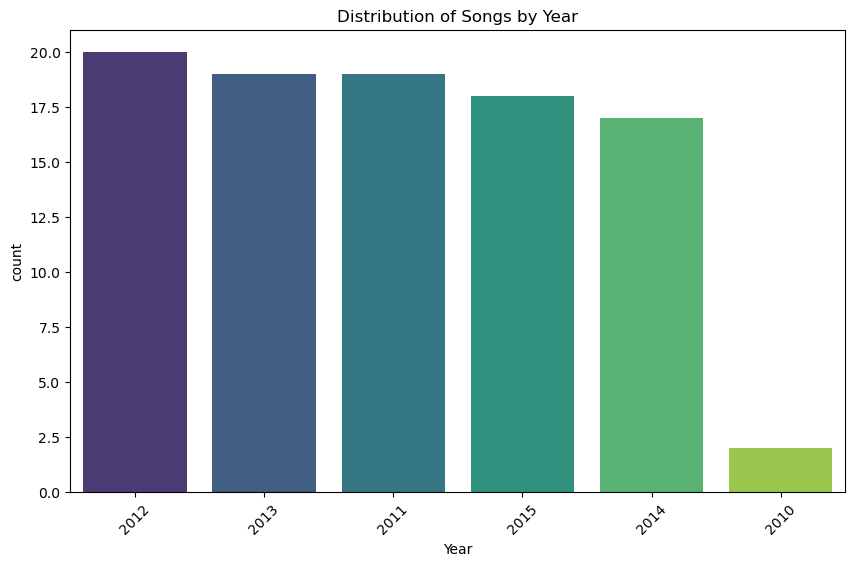

In [22]:
# Songs by year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', order=df['Year'].value_counts().index, palette='viridis')
plt.title('Distribution of Songs by Year')
plt.xticks(rotation=45)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_6032\356005041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Album(s)', order=df['Album(s)'].value_counts().index, palette='coolwarm')


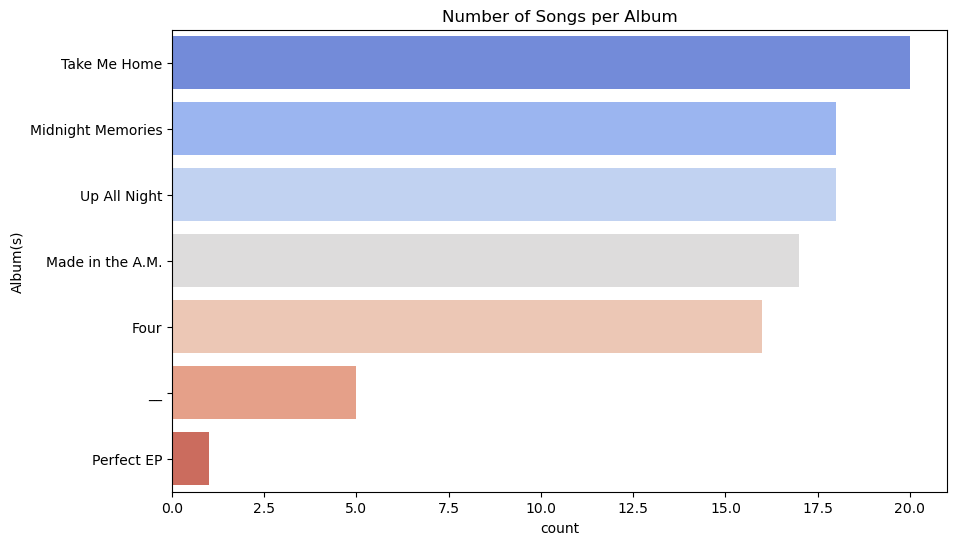

In [23]:
# Songs per album
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Album(s)', order=df['Album(s)'].value_counts().index, palette='coolwarm')
plt.title('Number of Songs per Album')
plt.show()

In [24]:
# Most frequent writers
writers = df['Writer(s)'].str.split(', ').explode()
top_writers = writers.value_counts().head(10)

C:\Users\dell\AppData\Local\Temp\ipykernel_6032\813611870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_writers.values, y=top_writers.index, palette='plasma')


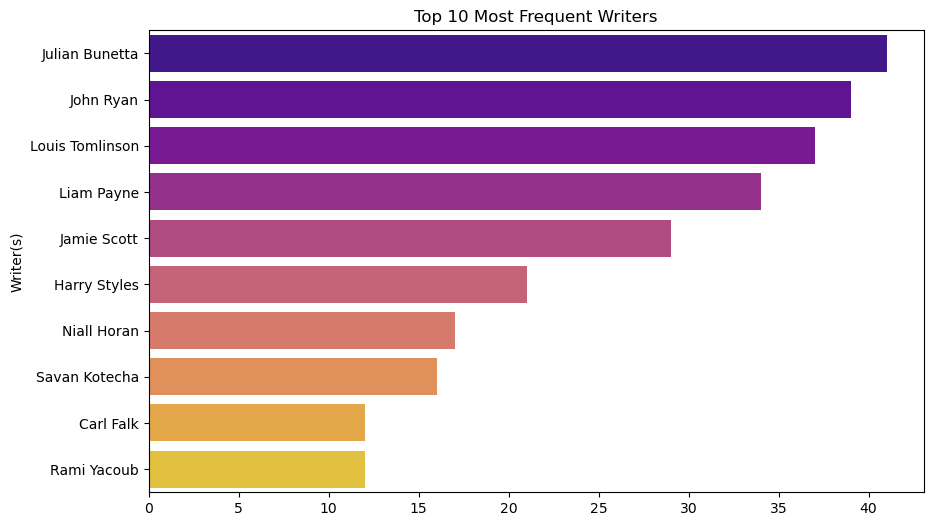

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_writers.values, y=top_writers.index, palette='plasma')
plt.title('Top 10 Most Frequent Writers')
plt.show()

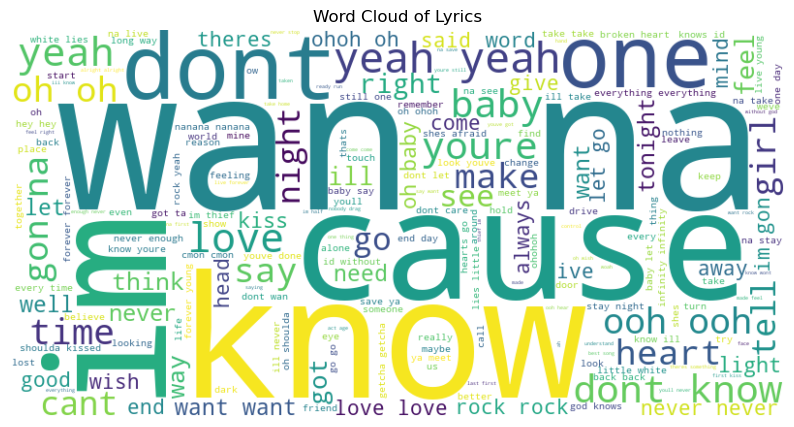

In [26]:
# Preprocess lyrics: Remove unwanted characters, lowercasing, etc.
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_lyrics(lyrics):
    lyrics = re.sub(r"\[.*?\]", "", lyrics)  # Remove annotations like [Verse]
    lyrics = re.sub(r"[^a-zA-Z\s]", "", lyrics)  # Remove special characters
    lyrics = lyrics.lower()  # Convert to lowercase
    tokens = word_tokenize(lyrics)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

df['cleaned_lyrics'] = df['Lyrics'].apply(preprocess_lyrics)

# Generate a word cloud of lyrics
all_lyrics = " ".join(df['cleaned_lyrics'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.show()

In [27]:
import warnings 
warnings.filterwarnings('ignore')

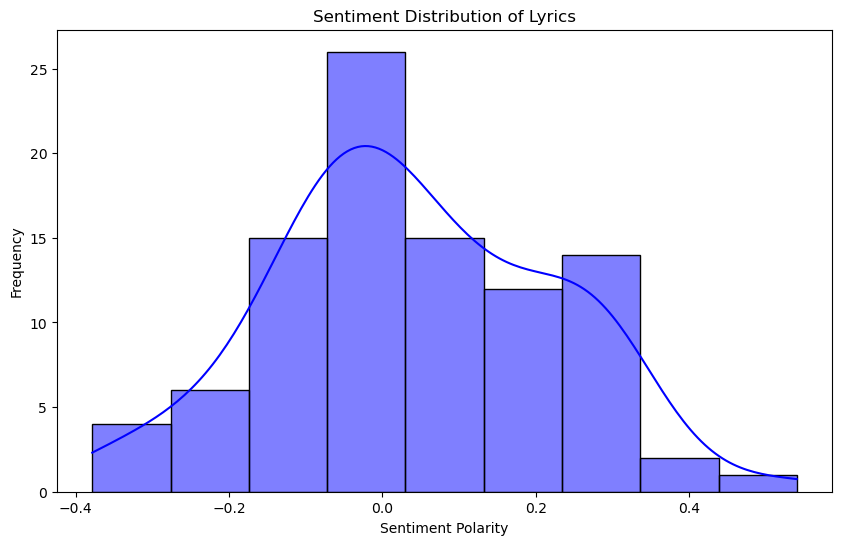

In [28]:
df['sentiment'] = df['cleaned_lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, color='blue')
plt.title('Sentiment Distribution of Lyrics')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Calculate similarity between songs based on lyrics
vectorizer = CountVectorizer()
lyric_vectors = vectorizer.fit_transform(df['cleaned_lyrics'])
similarity_matrix = cosine_similarity(lyric_vectors)

# Display the similarity matrix for the first 5 songs
pd.DataFrame(similarity_matrix, index=df['Song'], columns=df['Song']).iloc[:5, :5]

Song,"""18""","""A.M.""","""Act My Age""","""Alive""","""Another World"""
Song,,,,,
"""18""",1.000000,0.188310,0.084159,0.136843,0.042082
"""A.M.""",0.188310,1.000000,0.238344,0.150225,0.177612
"""Act My Age""",0.084159,0.238344,1.000000,0.136210,0.257013
"""Alive""",0.136843,0.150225,0.136210,1.000000,0.093628
"""Another World""",0.042082,0.177612,0.257013,0.093628,1.000000


In [30]:
# Display the similarity matrix for all the songs
pd.DataFrame(similarity_matrix, index=df['Song'], columns=df['Song']).iloc[:, :]

Song,"""18""","""A.M.""","""Act My Age""","""Alive""","""Another World""","""Back For You""","""Best Song Ever""","""Better Than Words""","""C'mon, C'mon""","""Change My Mind""",...,"""Truly, Madly, Deeply""","""Up All Night""","""Walking in the Wind""","""What a Feeling""","""What Makes You Beautiful""","""Where Do Broken Hearts Go""","""Why Don't We Go There""","""Wishing on a Star""","""Wolves""","""You & I"""
Song,,,,,,,,,,,,,,,,,,,,,
"""18""",1.000000,0.188310,0.084159,0.136843,0.042082,0.025567,0.207184,0.197217,0.077554,0.138801,...,0.321237,0.221903,0.046746,0.110242,0.142340,0.065696,0.172146,0.089883,0.076588,0.250108
"""A.M.""",0.188310,1.000000,0.238344,0.150225,0.177612,0.209154,0.360085,0.278891,0.132285,0.322238,...,0.138047,0.223618,0.150382,0.086284,0.303188,0.146767,0.253601,0.114689,0.244446,0.288316
"""Act My Age""",0.084159,0.238344,1.000000,0.136210,0.257013,0.087470,0.172663,0.060530,0.044388,0.263127,...,0.135541,0.066370,0.107460,0.037217,0.068495,0.061860,0.066247,0.113595,0.033026,0.056521
"""Alive""",0.136843,0.150225,0.136210,1.000000,0.093628,0.204846,0.134786,0.121674,0.050767,0.068766,...,0.128640,0.153294,0.113461,0.114948,0.189638,0.116562,0.194488,0.100756,0.076561,0.172533
"""Another World""",0.042082,0.177612,0.257013,0.093628,1.000000,0.122373,0.174060,0.164202,0.070472,0.287601,...,0.080071,0.055548,0.229639,0.041798,0.191535,0.116104,0.154188,0.104290,0.104020,0.097094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""Where Do Broken Hearts Go""",0.065696,0.146767,0.061860,0.116562,0.116104,0.098583,0.119927,0.165109,0.093859,0.241325,...,0.114158,0.083115,0.140433,0.062381,0.216562,1.000000,0.281566,0.196390,0.127392,0.143186
"""Why Don't We Go There""",0.172146,0.253601,0.066247,0.194488,0.154188,0.087708,0.113859,0.236519,0.081390,0.319250,...,0.064777,0.282465,0.104880,0.117547,0.354368,0.281566,1.000000,0.068547,0.127668,0.172662
"""Wishing on a Star""",0.089883,0.114689,0.113595,0.100756,0.104290,0.151092,0.129727,0.069176,0.025499,0.216758,...,0.122146,0.065299,0.112474,0.090840,0.103565,0.196390,0.068547,1.000000,0.047193,0.157558


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the lyrics column for analysis
lyrics = df['Lyrics']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform the lyrics
tfidf_matrix = tfidf_vectorizer.fit_transform(lyrics)

# Get feature names and their corresponding TF-IDF scores
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Create a DataFrame for better visualization of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_scores, columns=tfidf_features, index=df['Song'])

# Display the top 5 rows of the TF-IDF DataFrame
tfidf_df.head()

,ah,ain,alright,apart,away,baby,believe,best,break,bridge,...,way,wish,woah,won,words,world,ya,yeah,young,zayn
Song,,,,,,,,,,,,,,,,,,,,,
"""18""",0.0,0.0,0.000000,0.0,0.0,0.039604,0.061926,0.0,0.000000,0.012033,...,0.130669,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.032606,0.0,0.081098
"""A.M.""",0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.059258,0.023028,...,0.000000,0.0,0.000000,0.410495,0.000000,0.050390,0.0,0.374405,0.0,0.000000
"""Act My Age""",0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.031135,...,0.000000,0.0,0.000000,0.693751,0.000000,0.000000,0.0,0.084368,0.0,0.104921
"""Alive""",0.0,0.0,0.403732,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.020218,...,0.000000,0.0,0.053283,0.000000,0.000000,0.044241,0.0,0.027393,0.0,0.045422
"""Another World""",0.0,0.0,0.000000,0.0,0.0,0.026529,0.082964,0.0,0.000000,0.016121,...,0.145884,0.0,0.000000,0.000000,0.158657,0.423292,0.0,0.087365,0.0,0.054325


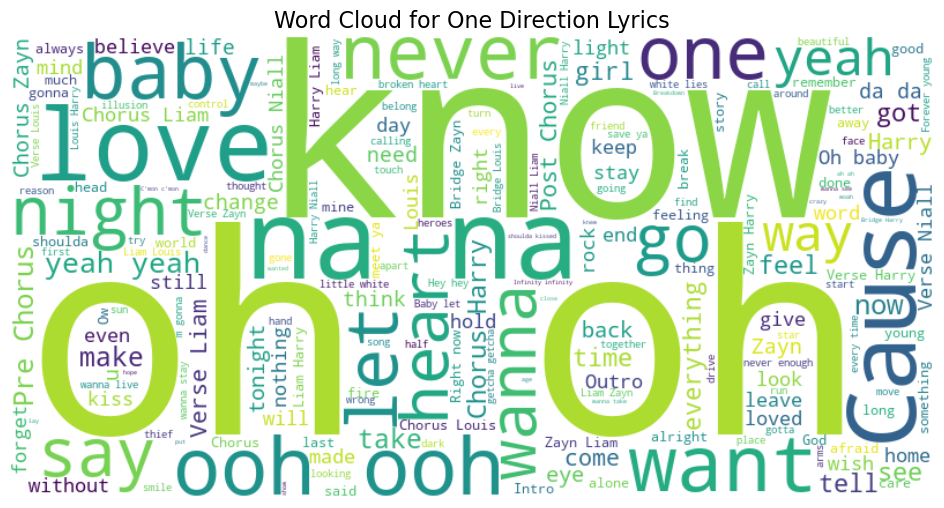

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a WordCloud for the entire dataset
all_lyrics = " ".join(lyrics)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for One Direction Lyrics", fontsize=16)
plt.show()

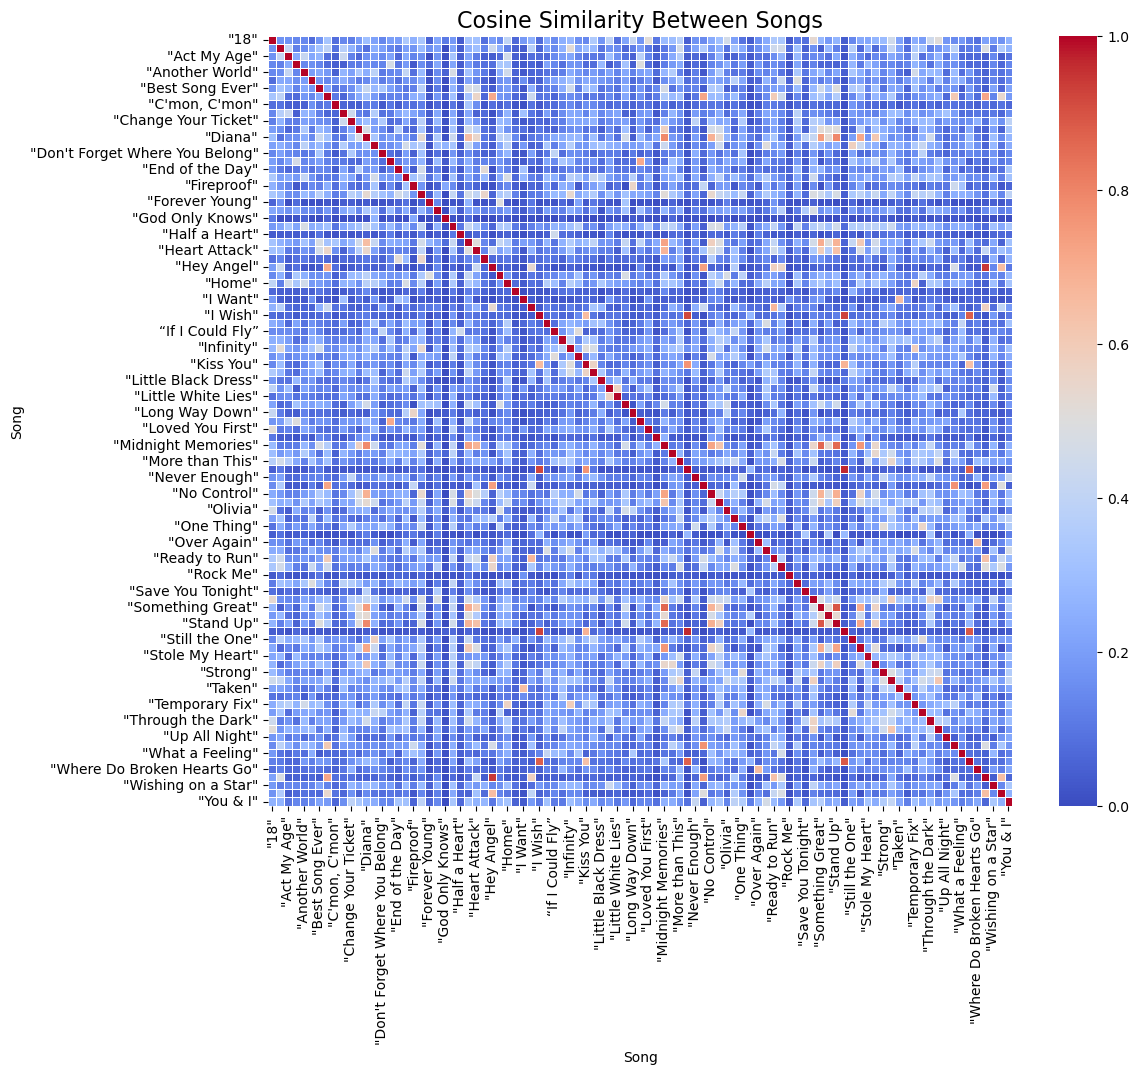

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Calculate cosine similarity between songs based on their TF-IDF vectors
cosine_sim = cosine_similarity(tfidf_matrix)

# Convert to a DataFrame for better visualization
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Song'], columns=df['Song'])

# Plot a heatmap to visualize song similarities
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim_df, cmap="coolwarm", linewidths=0.5)
plt.title("Cosine Similarity Between Songs", fontsize=16)
plt.show()

In [34]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert lyrics to a document-term matrix
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(lyrics)

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Display topics
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}: ", [terms[i] for i in topic.argsort()[-10:]])

Topic 1:  ['wanna', 'll', 'like', 'harry', 'baby', 'know', 'chorus', 'yeah', 'na', 'oh']
Topic 2:  ['know', 've', 'liam', 'harry', 'love', 'zayn', 'oh', 'chorus', 'ya', 'don']
Topic 3:  ['don', 'heart', 'wanna', 'know', 'like', 'harry', 'liam', 'night', 'chorus', 'ooh']
Topic 4:  ['liam', 'just', 'harry', 'don', 'rock', 'love', 'yeah', 'chorus', 'want', 'oh']
Topic 5:  ['ll', 'tell', 'just', 'harry', 'say', 'time', 'wanna', 'chorus', 'know', 'don']


In [35]:
from sklearn.cluster import KMeans

# Use the TF-IDF matrix for clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Assign cluster labels to songs
df['Cluster'] = clusters

# View clustered songs
for i in range(5):
    print(f"Cluster {i}: ", df[df['Cluster'] == i]['Song'].tolist())

Cluster 0:  ['"18"', '"Alive"', '"Drag Me Down"', '"Fireproof"', '"I Would"', '"Illusion"', '“Last First Kiss”', '"Little Black Dress"', '"Loved You First"', '"Over Again"', '"Perfect"', '"Strong"', '"Truly, Madly, Deeply"', '"What a Feeling"', '"You & I"']
Cluster 1:  ['"Best Song Ever"', '"C\'mon, C\'mon"', '"Clouds"', '"Diana"', '"End of the Day"', '"Fool\'s Gold"', '"Girl Almighty"', '"Happily"', '"Heart Attack"', '"Heroes"', '"History"', '"I Should\'ve Kissed You"', '"Live While We\'re Young"', '"Love You Goodbye"', '"Magic"', '"Midnight Memories"', '"No Control"', '"Nobody Compares"', '"She\'s Not Afraid"', '"Something Great"', '"Spaces"', '"Stand Up"', '"Stockholm Syndrome"', '"Story of My Life"', '"Through the Dark"']
Cluster 2:  ['"Act My Age"', '"Another World"', '"Change My Mind"', '"Does He Know?"', '"Everything About You"', '"God Only Knows"', '"Gotta Be You"', '"Home"', '"Infinity"', '"Moments"', '"Same Mistakes"', '"Save You Tonight"', '"Temporary Fix"']
Cluster 3:  ['"B

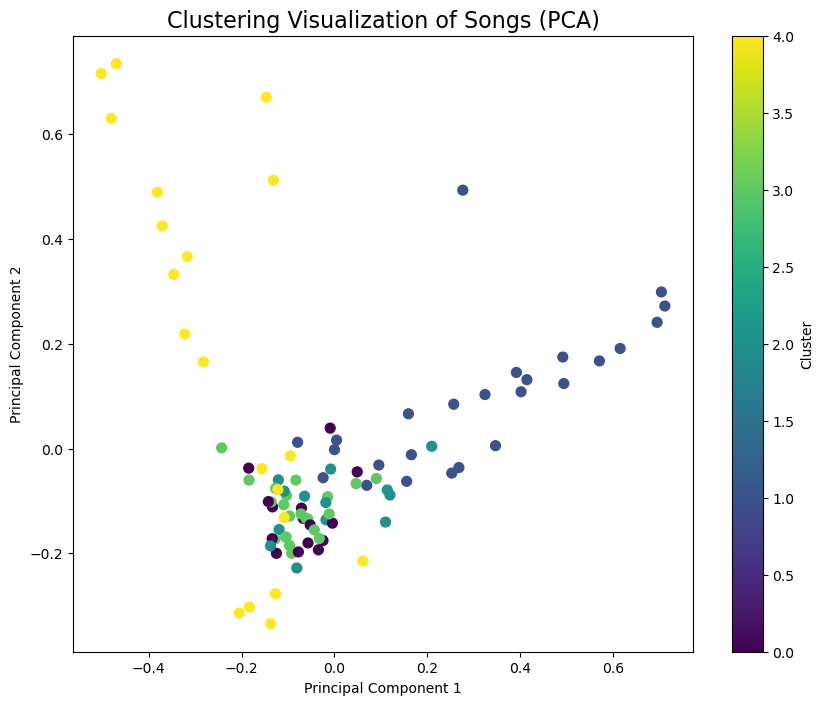

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Alternatively, use TSNE for non-linear dimensionality reduction
# tsne = TSNE(n_components=2, random_state=42)
# tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Visualize clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.title("Clustering Visualization of Songs (PCA)", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

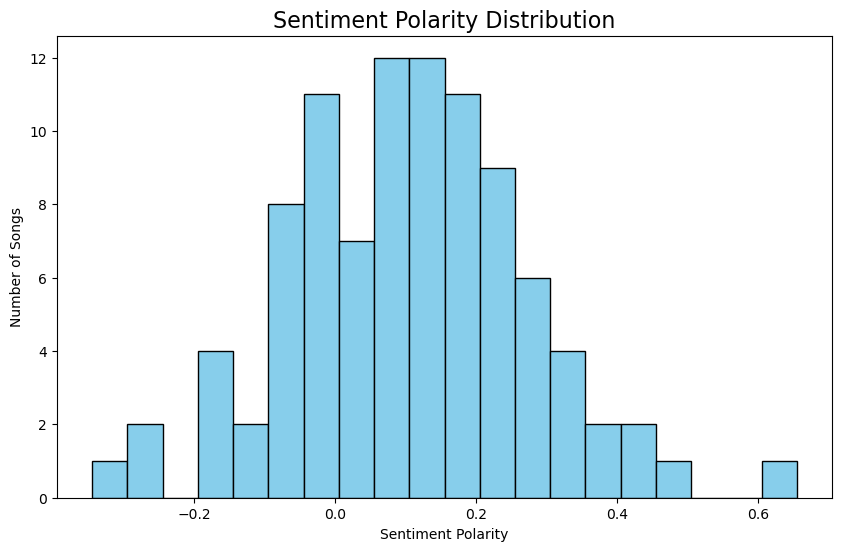

In [37]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Sentiment analysis
df['Sentiment'] = lyrics.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title("Sentiment Polarity Distribution", fontsize=16)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Songs")
plt.show()

In [38]:
import plotly.express as px
from IPython.display import IFrame

# Calculate word count for each song
df['word_count'] = df['cleaned_lyrics'].apply(lambda x: len(x.split()))

# Create the interactive scatter plot with Plotly
fig = px.scatter(
    df,
    x="sentiment",
    y="word_count",
    color="Song",  # Use 'Song' for coloring instead of 'track_name'
    hover_name="Song",  # Use 'Song' for hover information
    title="Sentiment vs Word Count in One Direction's Lyrics",
    labels={"sentiment": "Sentiment", "word_count": "Word Count"},
    template="plotly_dark"
)

# Save the plot as an HTML file
fig.write_html("sentiment_word_count.html")

# Display the HTML file as an interactive iframe in the notebook
IFrame("sentiment_word_count.html", width=850, height=600)

In [39]:
!pip install tensorflow

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
import warnings
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import re
from collections import Counter
import random
from IPython.display import IFrame
warnings.filterwarnings('ignore')

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_lyrics'])
total_words = len(tokenizer.word_index) + 1

In [42]:
input_sequences = []
for line in df['cleaned_lyrics'].dropna():
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [43]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
predictors, labels = input_sequences[:,:-1], input_sequences[:,-1]
labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [44]:
model = Sequential([
    Embedding(total_words, 64),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(predictors, labels, epochs=10, verbose=1)

Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 79s 148ms/step - accuracy: 0.0234 - loss: 6.4113
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 76s 147ms/step - accuracy: 0.0450 - loss: 5.7960
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 81s 157ms/step - accuracy: 0.0664 - loss: 5.5794
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 82s 159ms/step - accuracy: 0.0972 - loss: 5.2909
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 84s 163ms/step - accuracy: 0.1289 - loss: 4.9483
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 84s 163ms/step - accuracy: 0.1624 - loss: 4.5793
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 86s 166ms/step - accuracy: 0.1916 - loss: 4.2601
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 86s 166ms/step - accuracy: 0.2374 - loss: 3.9577
Epoch 9/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 86s 165ms/step - accuracy: 0.2754 - loss: 3.7072
Epoch 10/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 84s 163ms/step - accuracy: 0.3271 - loss: 3.4052


In [46]:
def generate_lyrics(seed_text, next_words=50):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word = tokenizer.index_word[np.argmax(predicted)]
        seed_text += " " + predicted_word
    return seed_text

In [47]:
seed_text = random.choice(df['cleaned_lyrics'].dropna().values)
print("Seed Text:", seed_text)
print("Generated Lyrics:\n", generate_lyrics(seed_text))

Seed Text: yeah uhhuh one two three quick sneaks middle night yeah tight dress top cut low uhhuh shes addicted feeling letting go ohwoah let go walks room lights dont want anyone know im one gets take home ohwoah take home every time tell want closes door shes afraid attention shes afraid running wild come shes afraid falling love shes afraid scary movies likes way kiss dark shes afraid fafafalling love love maybe shes tryna test wan na see hard im gon na work wan na see really tell much shes worth youre worth maybe friends told dont get closer hell break heart either way shes teasin hard hard cause every time tell feel says real one two three four shes afraid attention shes afraid running wild come shes afraid falling love shes afraid scary movies likes way kiss dark shes afraid fafafalling love love things say talking phone late late cant let get away oh say cant shes back door haha shes afraid attention shes afraid shes afraid running wild running wild come shes afraid falling love 

In [48]:
from collections import Counter
import pandas as pd

# Function to get top words for an album
def get_top_words(album):
    album_lyrics = " ".join(df[df['Album(s)'] == album]['Lyrics'])
    words = album_lyrics.split()
    most_common = Counter(words).most_common(10)
    return pd.DataFrame(most_common, columns=['Word', 'Frequency'])

# Example for a single album
album_name = "Made in the A.M."
top_words = get_top_words(album_name)
print(top_words)

   Word  Frequency
0   you        252
1     I        228
2   the        214
3    me        102
4    of         82
5     a         81
6   and         79
7    to         75
8  your         73
9   can         72


In [49]:
from collections import Counter
import pandas as pd

# Function to get top words for an album
def get_top_words(album):
    album_lyrics = " ".join(df[df['Album(s)'] == album]['Lyrics'])
    words = album_lyrics.split()
    most_common = Counter(words).most_common(10)
    return pd.DataFrame(most_common, columns=['Word', 'Frequency'])

# Example for a single album
album_name = "Take Me Home"
top_words = get_top_words(album_name)
print(top_words)

   Word  Frequency
0     I        269
1   you        260
2   the        146
3    me        123
4    to        113
5  know         96
6   And         80
7    be         74
8  your         74
9   all         68


In [50]:
from collections import Counter
import pandas as pd

# Function to get top words for an album
def get_top_words(album):
    album_lyrics = " ".join(df[df['Album(s)'] == album]['Lyrics'])
    words = album_lyrics.split()
    most_common = Counter(words).most_common(10)
    return pd.DataFrame(most_common, columns=['Word', 'Frequency'])

# Example for a single album
album_name = "Up All Night"
top_words = get_top_words(album_name)
print(top_words)

   Word  Frequency
0   you        315
1     I        307
2   the        135
3    me        109
4    to        108
5   all         84
6  that         79
7  your         77
8     a         76
9    my         72


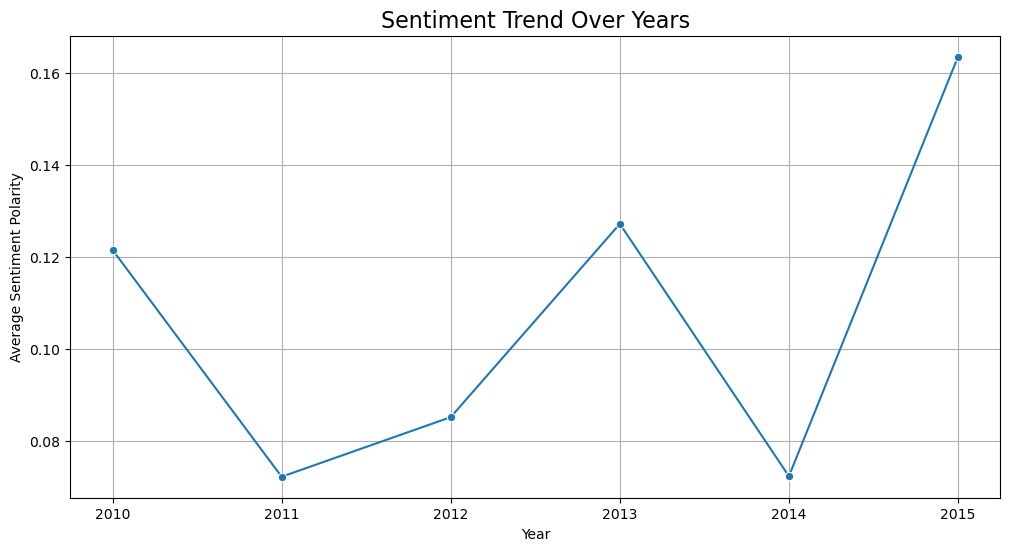

In [51]:
import seaborn as sns

# Sentiment trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Sentiment', marker='o', ci=None)
plt.title("Sentiment Trend Over Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Sentiment Polarity")
plt.grid()
plt.show()

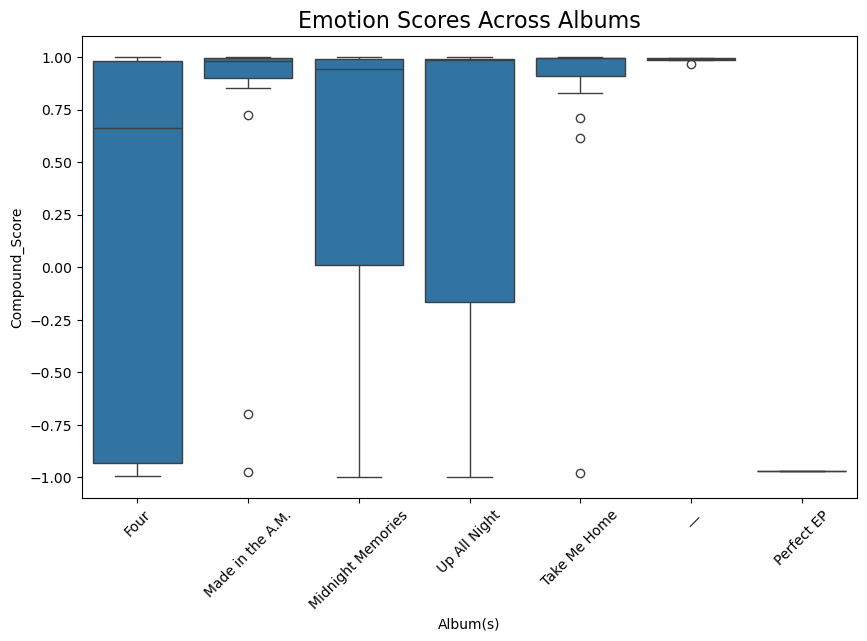

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Calculate emotion scores
df['Emotion_Scores'] = lyrics.apply(lambda x: sia.polarity_scores(str(x)))

# Extract compound score for visualization
df['Compound_Score'] = df['Emotion_Scores'].apply(lambda x: x['compound'])

# Visualize emotion scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Album(s)', y='Compound_Score', data=df)
plt.xticks(rotation=45)
plt.title("Emotion Scores Across Albums", fontsize=16)
plt.show()

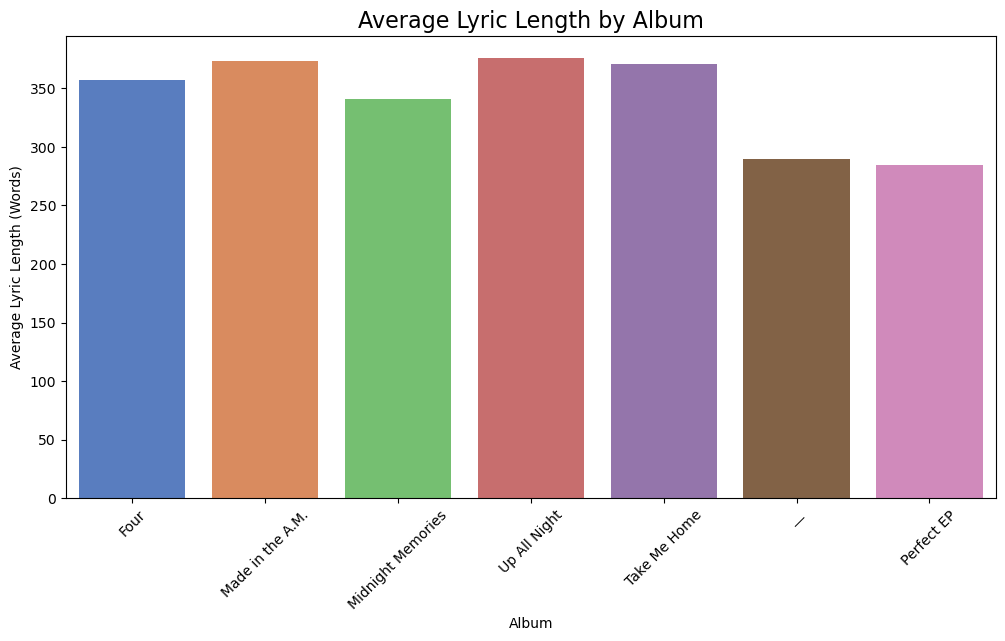

In [53]:
# Calculate lyric length
df['Lyric_Length'] = lyrics.apply(lambda x: len(str(x).split()))

# Plot average lyric length by album
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Album(s)', y='Lyric_Length', ci=None, palette='muted')
plt.xticks(rotation=45)
plt.title("Average Lyric Length by Album", fontsize=16)
plt.xlabel("Album")
plt.ylabel("Average Lyric Length (Words)")
plt.show()

In [54]:
# Group by cluster and extract key terms
for cluster in range(5):
    cluster_songs = df[df['Cluster'] == cluster]
    cluster_lyrics = " ".join(cluster_songs['Lyrics'])
    print(f"Cluster {cluster}: Top Words")
    print(Counter(cluster_lyrics.split()).most_common(10))
    print("\n")

Cluster 0: Top Words
[('I', 276), ('you', 219), ('the', 130), ('me', 120), ('to', 81), ('be', 77), ('like', 62), ('And', 62), ('a', 61), ('it', 61)]


Cluster 1: Top Words
[('I', 358), ('you', 275), ('the', 221), ('me', 142), ('to', 132), ('be', 106), ('we', 102), ('and', 99), ('a', 98), ('of', 95)]


Cluster 2: Top Words
[('you', 196), ('I', 107), ('the', 89), ('to', 85), ("I'll", 81), ('be', 81), ('your', 53), ('me', 52), ('my', 48), ('it', 48)]


Cluster 3: Top Words
[('I', 335), ('you', 297), ('the', 149), ('me', 127), ("don't", 105), ('know', 104), ('a', 102), ("I'm", 101), ('your', 101), ('my', 100)]


Cluster 4: Top Words
[('I', 252), ('you', 239), ('the', 202), ('to', 106), ('me', 100), ('wanna', 99), ('all', 77), ("don't", 67), ('it', 67), ('in', 60)]




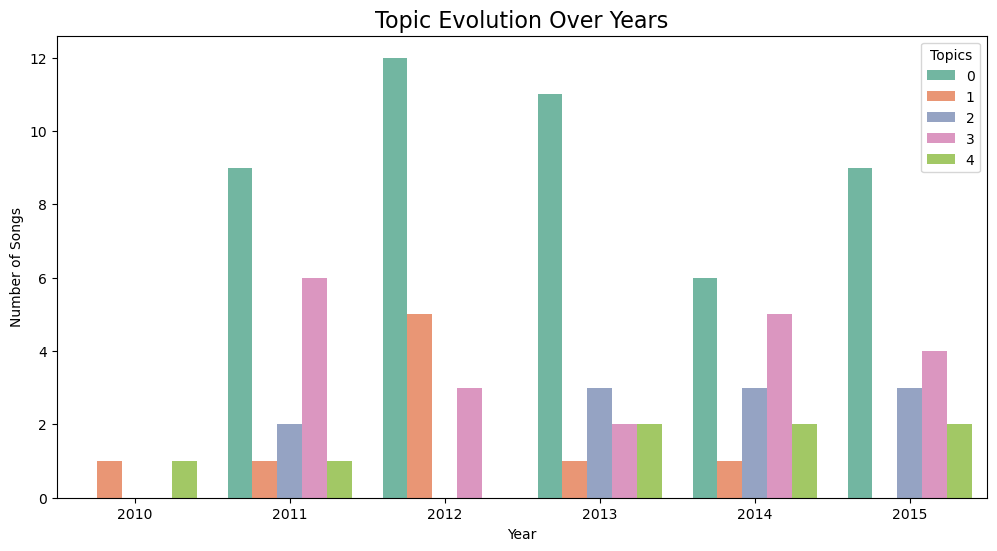

In [55]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Vectorize lyrics for LDA
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
doc_term_matrix = vectorizer.fit_transform(df['Lyrics'].fillna(''))

# Perform LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Map topics to years
df['Dominant_Topic'] = np.argmax(lda.transform(doc_term_matrix), axis=1)

# Plot topic evolution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', hue='Dominant_Topic', palette='Set2')
plt.title("Topic Evolution Over Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.legend(title="Topics")
plt.show()

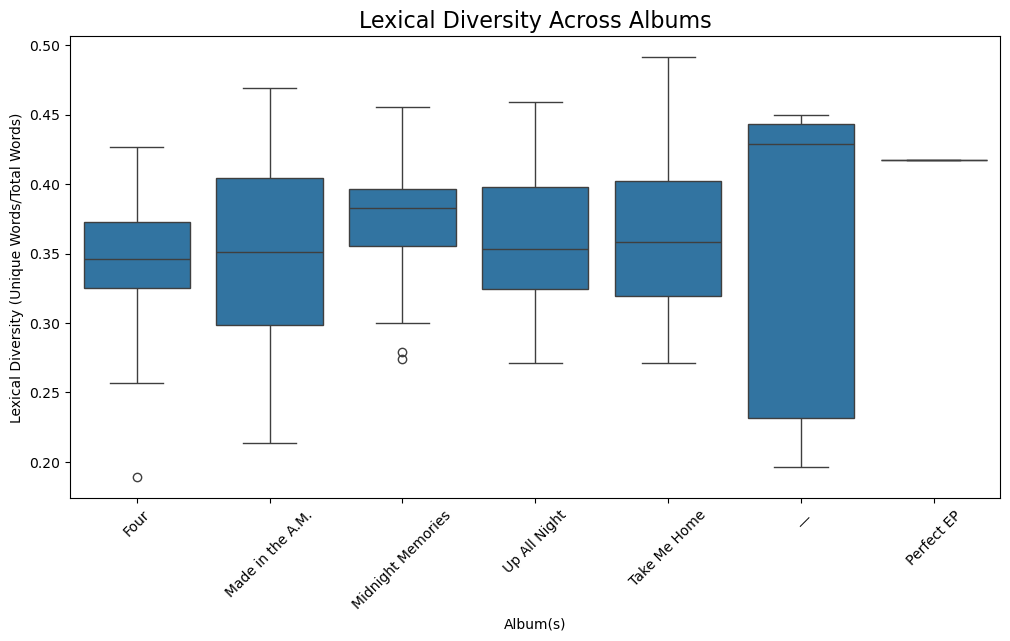

In [56]:
# Calculate lexical diversity
df['Lexical_Diversity'] = df['Lyrics'].apply(lambda x: len(set(str(x).split())) / len(str(x).split()))

# Compare lexical diversity across albums
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Album(s)', y='Lexical_Diversity')
plt.xticks(rotation=45)
plt.title("Lexical Diversity Across Albums", fontsize=16)
plt.ylabel("Lexical Diversity (Unique Words/Total Words)")
plt.show()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = bigram_vectorizer.fit_transform(df['Lyrics'].fillna(''))

# Summarize top bigrams
bigram_freq = bigram_matrix.sum(axis=0).A1
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_df = pd.DataFrame({'Bigram': bigrams, 'Frequency': bigram_freq})
bigram_df = bigram_df.sort_values(by='Frequency', ascending=False).head(10)
print(bigram_df)

            Bigram  Frequency
4009         oh oh        474
3777         na na        238
4092       ooh ooh        167
682   chorus harry        139
6231     yeah yeah        119
4254    pre chorus        112
1092      don know         99
713    chorus zayn         98
5609    verse liam         72
4241   post chorus         71


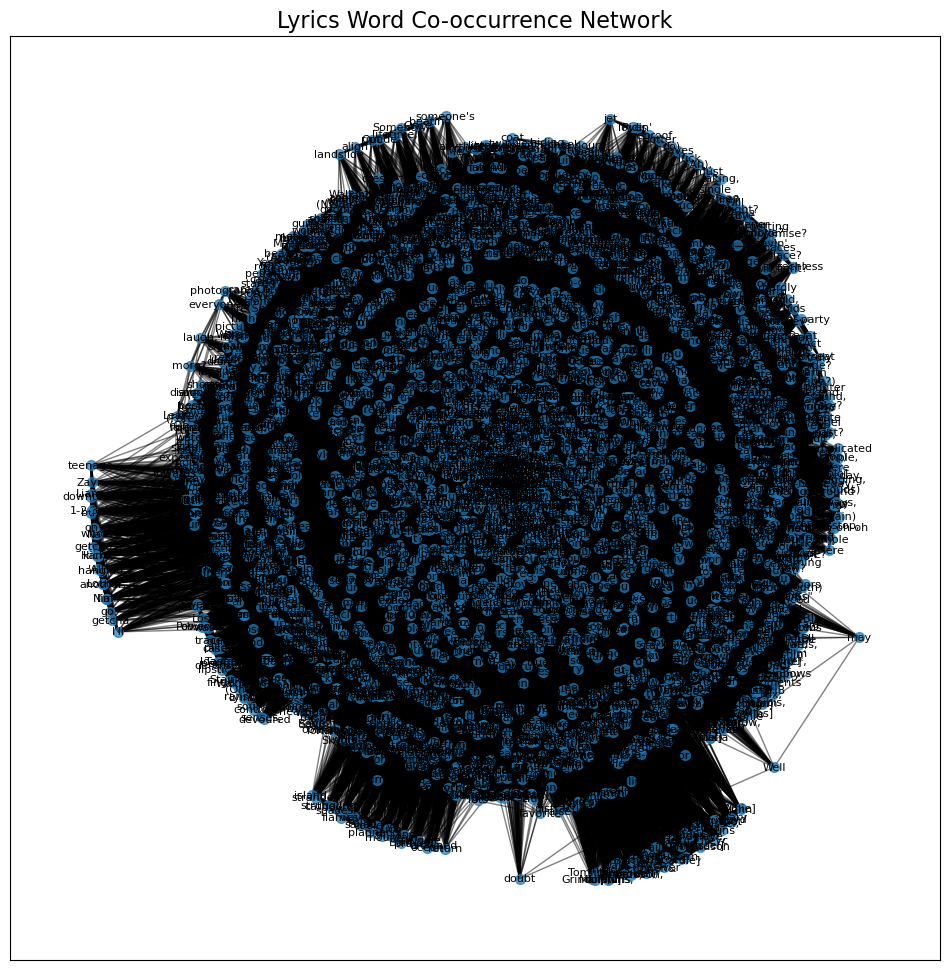

In [58]:
import networkx as nx
from itertools import combinations
from collections import Counter

# Extract co-occurring words (e.g., bigrams)
co_occurrence = Counter()
for lyric in df['Lyrics'].dropna():
    words = set(lyric.split())
    co_occurrence.update(combinations(words, 2))

# Build the network graph
G = nx.Graph()
for pair, weight in co_occurrence.items():
    G.add_edge(pair[0], pair[1], weight=weight)

# Visualize the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Lyrics Word Co-occurrence Network", fontsize=16)
plt.show()

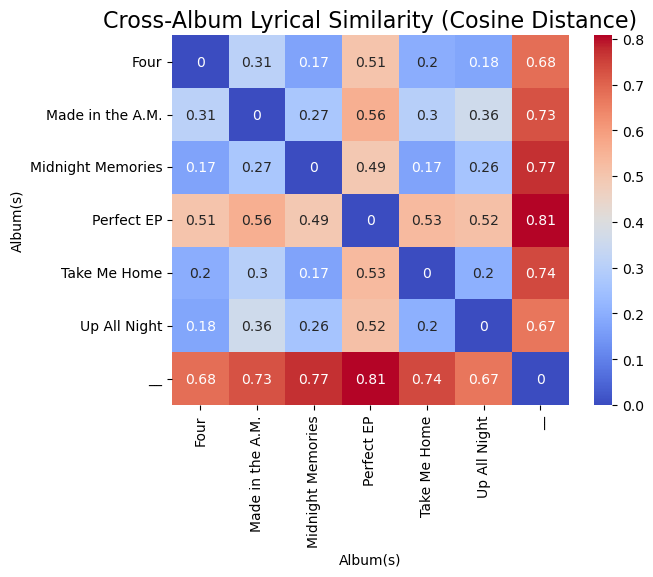

In [59]:
from sklearn.metrics import pairwise_distances

# Compute distances between albums
album_lyrics = df.groupby('Album(s)')['Lyrics'].apply(lambda x: ' '.join(x))
album_tfidf = vectorizer.fit_transform(album_lyrics)
album_distances = pairwise_distances(album_tfidf, metric='cosine')

# Convert to DataFrame
distance_df = pd.DataFrame(album_distances, index=album_lyrics.index, columns=album_lyrics.index)
sns.heatmap(distance_df, cmap='coolwarm', annot=True)
plt.title("Cross-Album Lyrical Similarity (Cosine Distance)", fontsize=16)
plt.show()

In [60]:
!pip install text2emotion

   ---------------------------------------- 0.0/586.9 kB ? eta -:--:--
   --------------------------------------- 586.9/586.9 kB 21.7 MB/s eta 0:00:00


In [61]:
!pip install emoji==1.6.3

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170309 sha256=28a9cf07151ea8cfae28ab78e9610120ce556816bd20e5284744b8bdd273c9fc
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\29\ac\d0\500333a69351f83b2d8fcae39a6c612abdc852621dd0f83c05
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.14.0
    Uninstalling emoji-2.14.0:
      Successfully uninstalled emoji-2.14.0


In [62]:
!pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43341 sha256=613ac860a7a8b2cafc3d5f0eb2de973996b72022e3905af245fae117b703f39f
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\1f\e8\d0\e3c3da0ef3b37ef4381dbf5c9401f3a9861a63ce221b13d8bb
Successfully built nrclex


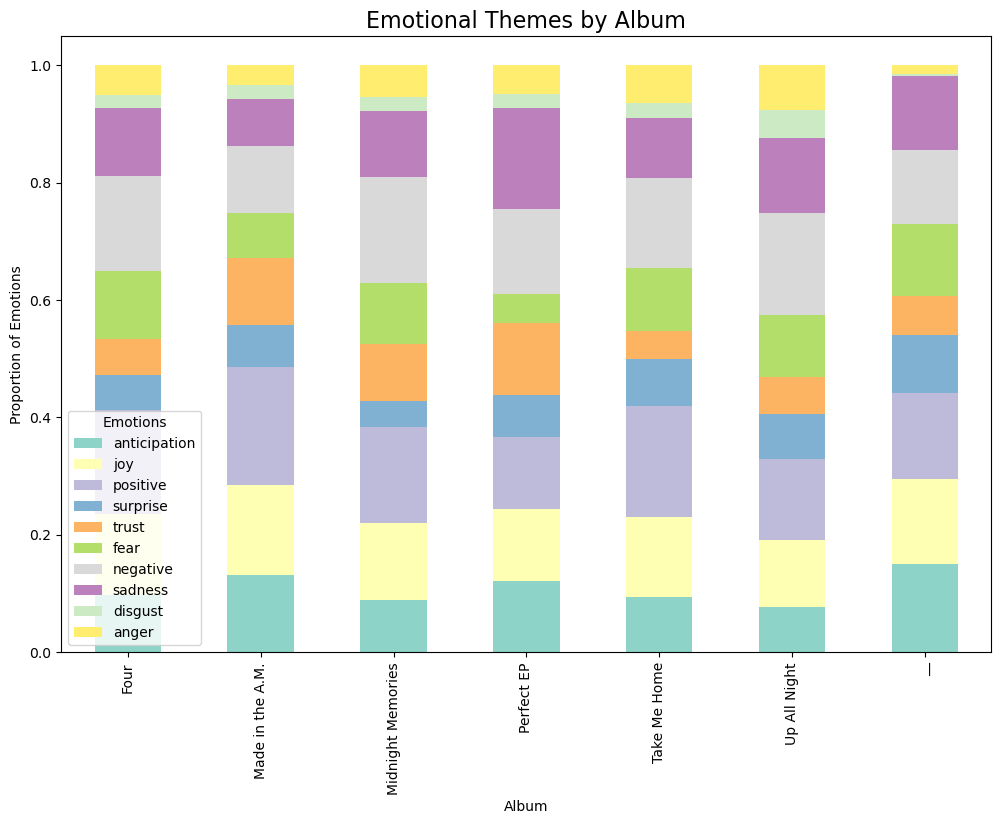

In [63]:
from nrclex import NRCLex
import pandas as pd

# Function to extract emotions
def extract_emotions(lyric):
    emotion = NRCLex(str(lyric))
    return emotion.raw_emotion_scores

# Apply emotion analysis to the dataset
df['Emotions'] = df['Lyrics'].apply(extract_emotions)

# Create a DataFrame of aggregated emotions by album
emotion_df = pd.DataFrame(df['Emotions'].tolist()).fillna(0).join(df['Album(s)'])
emotion_summary = emotion_df.groupby('Album(s)').sum()

# Normalize scores for visualization
emotion_summary = emotion_summary.div(emotion_summary.sum(axis=1), axis=0)

# Plot emotion trends
emotion_summary.plot(kind='bar', figsize=(12, 8), stacked=True, colormap='Set3')
plt.title("Emotional Themes by Album", fontsize=16)
plt.xlabel("Album")
plt.ylabel("Proportion of Emotions")
plt.legend(title="Emotions")
plt.show()

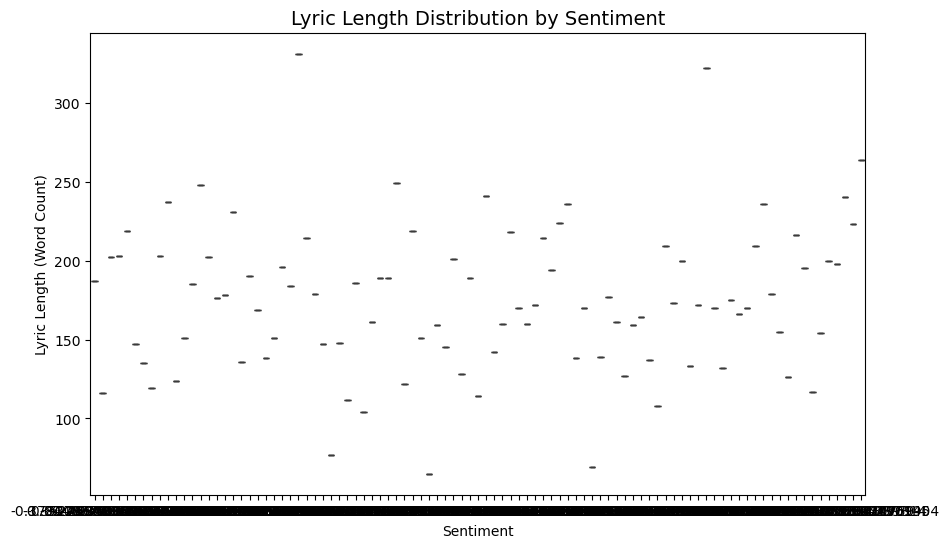

In [64]:
# Plot the relationship between lyric length and sentiment
df['Lyric_Length'] = df['cleaned_lyrics'].apply(lambda x: len(x.split()))

# Use a boxplot to show the distribution of lyric length across sentiments
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='Lyric_Length', palette='coolwarm')
plt.title('Lyric Length Distribution by Sentiment', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Lyric Length (Word Count)')
plt.show()

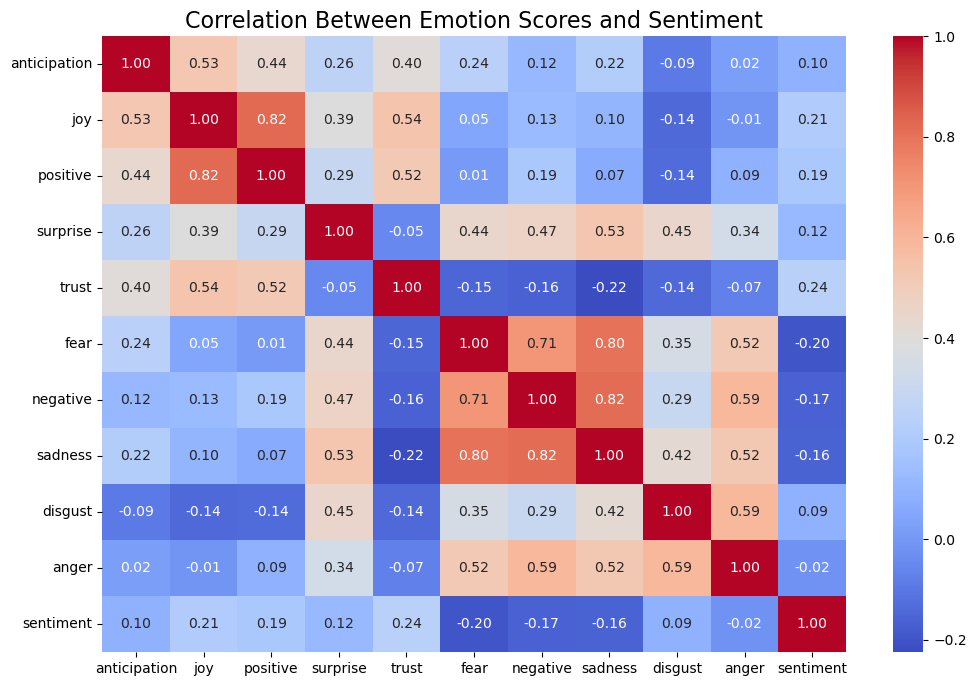

In [65]:
# Normalize emotion scores (assuming they are in JSON format)
emotion_data = pd.json_normalize(df['Emotions'])

# Combine the emotion data with sentiment
emotion_data['sentiment'] = df['sentiment']

# Calculate correlation between emotion scores and sentiment
correlation_matrix = emotion_data.corr()

# Plot a heatmap to visualize the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Emotion Scores and Sentiment', fontsize=16)
plt.show()

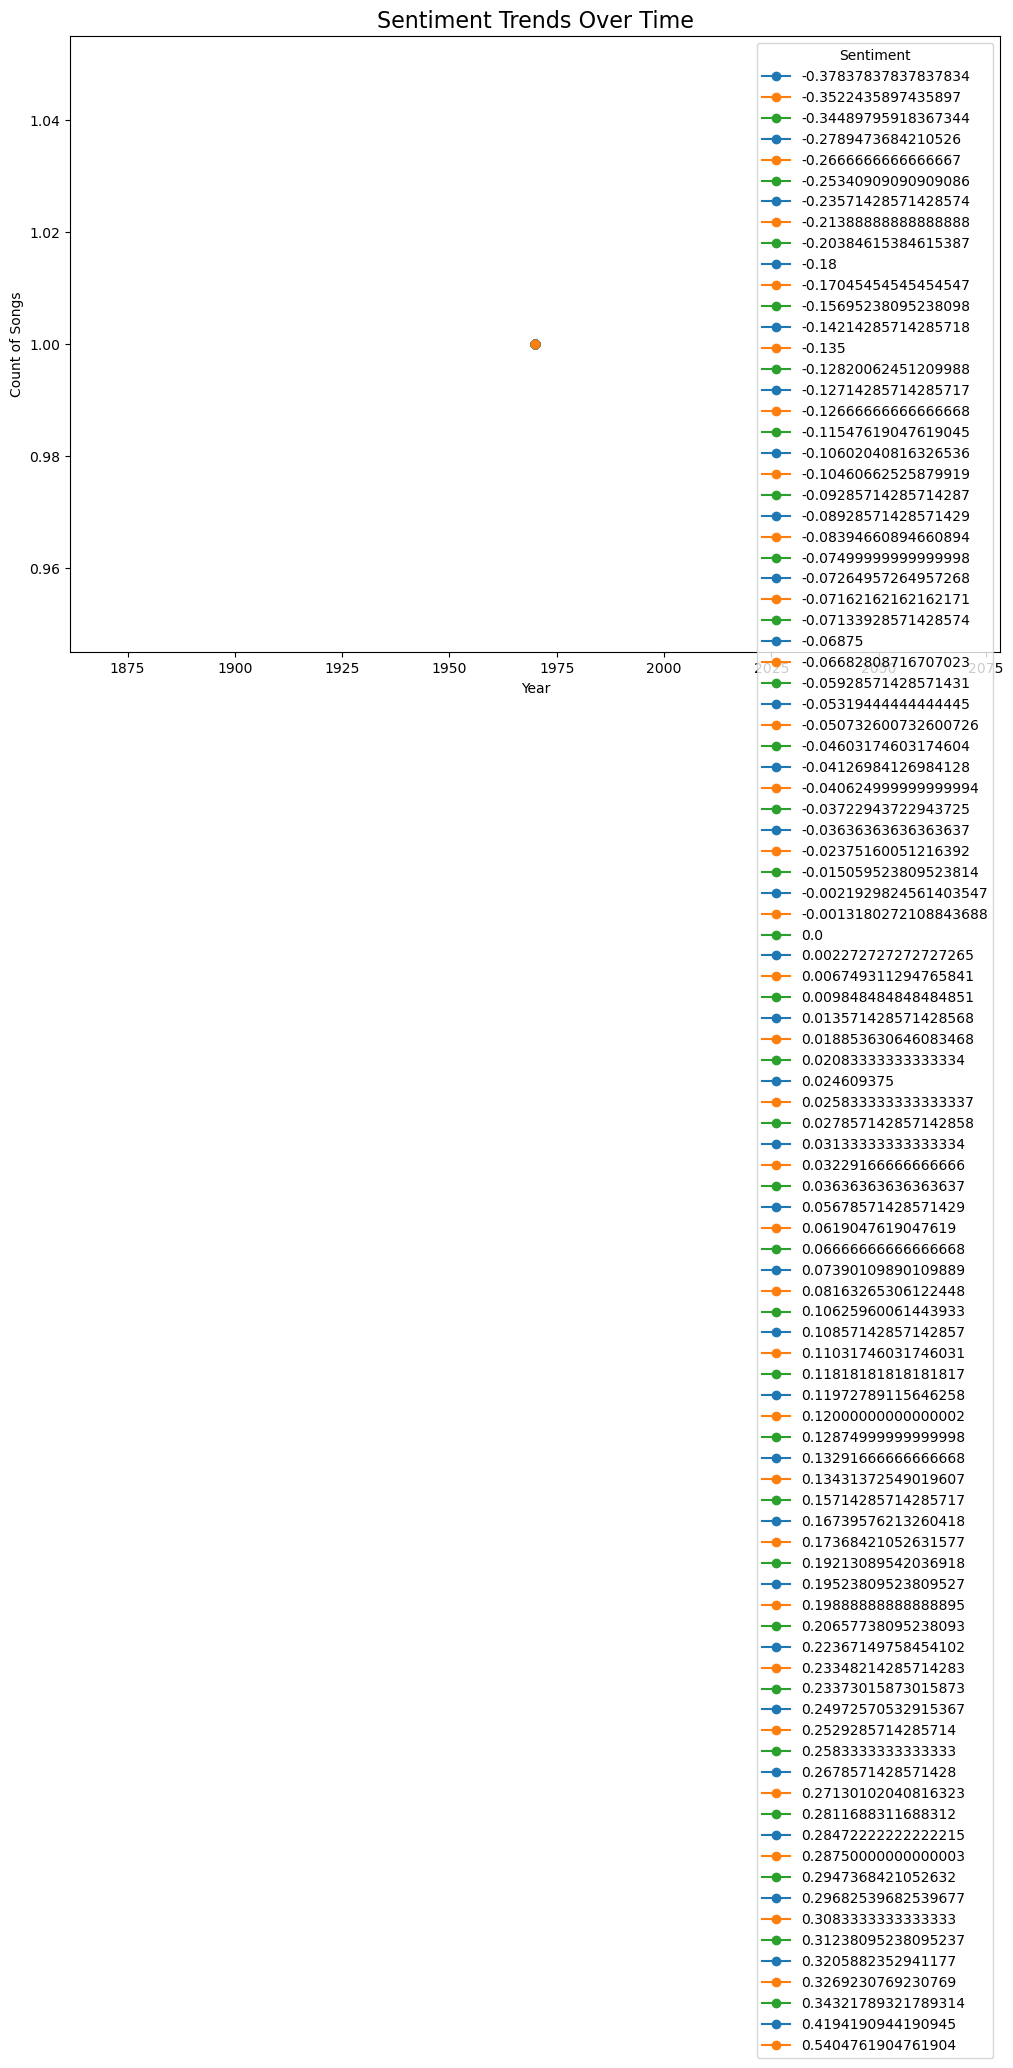

In [66]:
# If 'Year' is available, let's plot sentiment distribution over time
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year

# Group by year and sentiment to see trends over time
sentiment_trends = df.groupby(['Year', 'sentiment']).size().unstack(fill_value=0)

# Plot the trend over time
sentiment_trends.plot(kind='line', figsize=(12, 8), marker='o', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Sentiment Trends Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count of Songs')
plt.legend(title='Sentiment')
plt.show()

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize lyrics using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_lyrics'])

# Get top terms for each album (using a small example of 5 albums)
top_n = 10
albums = df['Album(s)'].unique()[:5]  # Adjust if you want more albums
for album in albums:
    album_lyrics = df[df['Album(s)'] == album]['cleaned_lyrics']
    album_tfidf = tfidf_vectorizer.transform(album_lyrics)
    sorted_indices = album_tfidf.sum(axis=0).argsort()[0, ::-1]
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in sorted_indices[:top_n]]
    
    print(f"Top {top_n} words for album '{album}':")
    print(top_words)
    print()

Top 10 words for album 'Four':
[array([['oh', 'baby', 'na', ..., 'paris', 'pages', 'aagain']],
      dtype=object)]

Top 10 words for album 'Made in the A.M.':
[array([['ooh', 'hey', 'yeah', ..., 'old', 'ohwoah', 'aagain']],
      dtype=object)]

Top 10 words for album 'Midnight Memories':
[array([['know', 'oh', 'dont', ..., 'opposite', 'opens', 'aagain']],
      dtype=object)]

Top 10 words for album 'Up All Night':
[array([['want', 'ill', 'dont', ..., 'pedals', 'pedal', 'aagain']],
      dtype=object)]

Top 10 words for album 'Take Me Home':
[array([['yeah', 'baby', 'love', ..., 'sounds', 'kind', 'zayn']],
      dtype=object)]



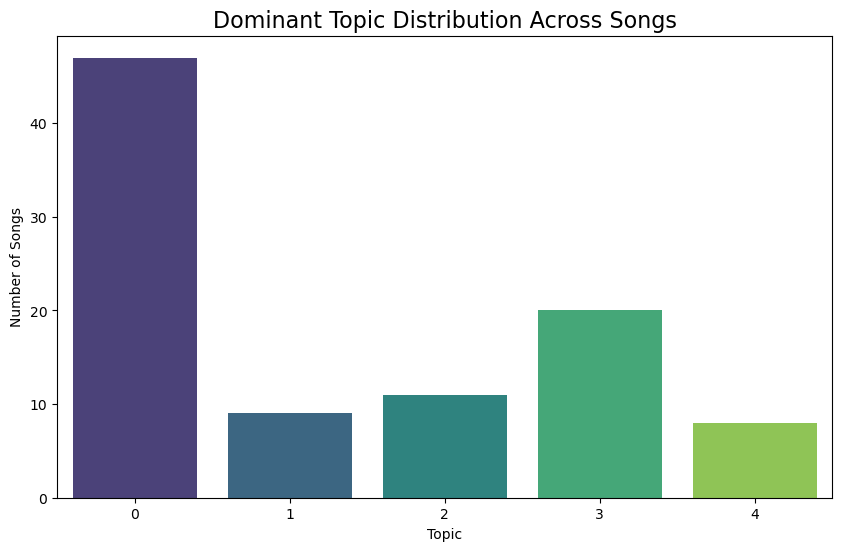

In [68]:
topic_distribution = df['Dominant_Topic'].value_counts()

# Plot the topic distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_distribution.index, y=topic_distribution.values, palette='viridis')
plt.title('Dominant Topic Distribution Across Songs', fontsize=16)
plt.xlabel('Topic')
plt.ylabel('Number of Songs')
plt.show()